In [1]:
import pandas
import requests

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
datasets_url = (
    "https://raw.githubusercontent.com/lutydlitatova/czechitas-datasets/main/datasets"
)

r = requests.get(f"{datasets_url}/wine-quality.csv")
open("wine-quality.csv", "wb").write(r.content)
r = requests.get(f"{datasets_url}/wine-quality-targets.csv")
open("wine-quality-targets.csv", "wb").write(r.content)

r = requests.get(f"{datasets_url}/wine-regions.csv")
open("wine-regions.csv", "wb").write(r.content)
r = requests.get(f"{datasets_url}/wine-regions-targets.csv")
open("wine-regions-targets.csv", "wb").write(r.content)

363

In [8]:
X = pandas.read_csv("wine-quality.csv")
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8
1,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8
2,6.8,0.26,0.42,1.7,0.049,41.0,122.0,0.9930,3.47,0.48,10.5
3,6.2,0.45,0.26,4.4,0.063,63.0,206.0,0.9940,3.27,0.52,9.8
4,6.7,0.23,0.31,2.1,0.046,30.0,96.0,0.9926,3.33,0.64,10.7


In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape
X

array([[-0.36991642,  2.18688824,  1.26894082, ...,  0.81156422,
        -0.68417828,  1.37235292],
       [-0.36991642,  2.18688824,  1.26894082, ...,  0.81156422,
        -0.68417828,  1.37235292],
       [ 0.07530049, -0.44372069,  0.80534652, ...,  1.69520939,
        -0.01019177, -0.30709165],
       ...,
       [-0.51832206,  0.14816632,  1.11440939, ...,  0.24350661,
        -0.98372784,  0.86121762],
       [-1.11194462,  0.50987505, -1.28082785, ...,  2.01079696,
        -0.60929089,  0.49612097],
       [-0.36991642,  1.33194034, -2.28528218, ...,  0.24350661,
        -0.98372784, -1.03728493]])

In [12]:
tsne = TSNE(
    init="pca",
    n_components=2,
    perplexity=10,
    learning_rate="auto",
    random_state=0,
)
X = tsne.fit_transform(X)

c:\users\klara\pycharmprojects\kurzpython2\venv\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [13]:
X.shape

(338, 2)

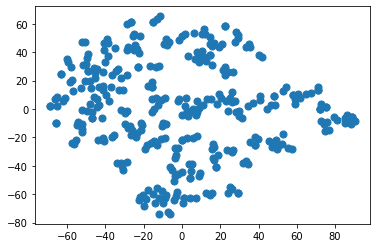

In [14]:
plt.scatter(X[:, 0], X[:, 1], s=50)

In [24]:
model = KMeans(n_clusters=10, random_state=0)
labels = model.fit_predict(X)

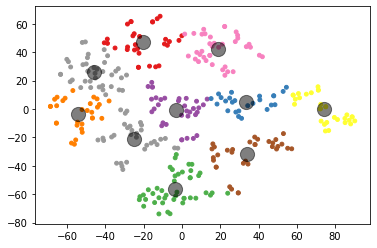

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=15, cmap="Set1")
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)

In [27]:
silhouette_score(X, labels)

0.42324978

For n_clusters = 10 The average silhouette_score is : 0.42324978


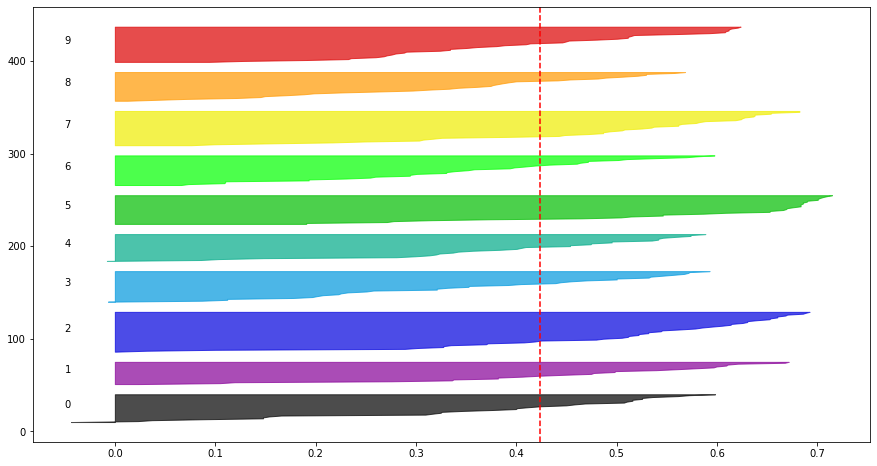

In [28]:
# Podle
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
n_clusters = model.n_clusters

fig, ax = plt.subplots(figsize=(15, 8))

silhouette_avg = silhouette_score(X, labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.axvline(x=silhouette_avg, color="red", linestyle="--")

In [29]:
y = pandas.read_csv("wine-quality-targets.csv")
y = y["quality"]

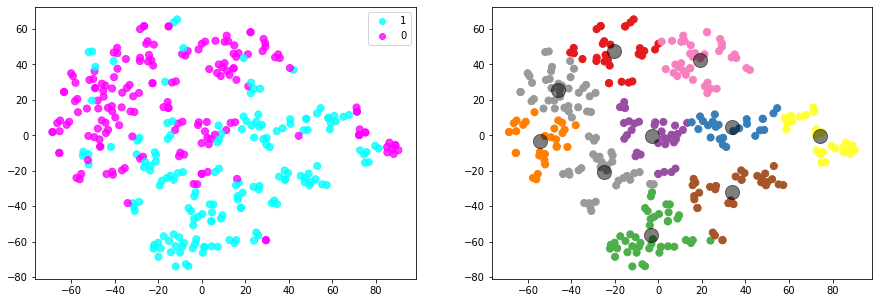

In [30]:
plt.figure(figsize=(15, 5))

# sp1
plt.subplot(121)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="cool", alpha=0.8)
centers = model.cluster_centers_
plt.legend(handles=scatter.legend_elements()[0], labels=list(y.unique()))

# sp2
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="Set1")
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)